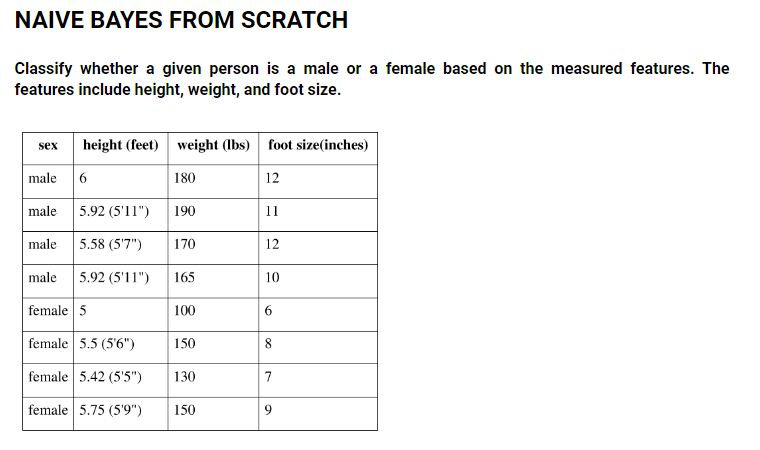

In [ ]:
import pandas as pd
import numpy as np

# Create an empty dataframe
data = pd.DataFrame()

# Create our target variable
data['Gender'] = ['male','male','male','male','female','female','female','female']

# Create our feature variables
data['Height'] = [6,5.92,5.58,5.92,5,5.5,5.42,5.75]
data['Weight'] = [180,190,170,165,100,150,130,150]
data['Foot_Size'] = [12,11,12,10,6,8,7,9]

In [ ]:
'''
Though we have very small dataset, we are dividing the dataset into train and test 
so that it can be used in other model prediction. 
We are importing gnb() from sklearn and we are training the model with out dataset.'''
X = data.drop(['Gender'],axis=1) 
y=data.Gender

  
# splitting X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
  
# training the model on training set
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
  
# making predictions on the testing set
y_pred = gnb.predict(X_test)

In [ ]:
'''
Now, our model is ready. Let’s use this model to predict on new data.'''
# Create our target variable
data1 = pd.DataFrame()

# Create our feature variables
data1['Height'] = [6]
data1['Weight'] = [130]
data1['Foot_Size'] = [8]

y_pred = gnb.predict(data1)
if y_pred==0:
    print ("female")
else:
    print ("male")

male


<ipython-input-30-ddba24c05144>:12: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if y_pred==0:


Step-1: Loading Initial Libraries
We’ll begin by loading some basic libraries that will be used to import and view the dataset.

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

Step-2: Importing Dataset

Now, we’ll submit the cancer detection dataset from Kaggle that we used to do our Naive Bayes classification.

import from kaggle... Breast Cancer Wisconsin (Diagnostic) Data Set

In [ ]:
dataset = pd.read_csv("cancer.csv")

Step-3: Exploring Dataset
Let’s take a quick look at the dataset using the head() method.

Following that, we’ll analyze the columns included inside the dataset using the info() method.

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

We can see from the information above that the id and unnamed:32 columns are not relevant, so we can eliminate them.

In [ ]:
dataset = dataset.drop(["id"], axis = 1)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [ ]:
dataset = dataset.drop(["Unnamed: 32"], axis = 1)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [ ]:
dataset.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         M        17.99         10.38          122.80     1001.0   
1         M        20.57         17.77          132.90     1326.0   
2         M        19.69         21.25          130.00     1203.0   
3         M        11.42         20.38           77.58      386.1   
4         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33           184.60   
1         0.1812  ...         24.99          23.41           158.80   
2         0.2069  ...         23.57          25.53           152.50   
3         0.2597  ...         14.91          26.50            98.87   
4         0.1809  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 31 columns]

Step-4: Visualizing Dataset

Malignant Tumor Dataframe

In [ ]:
M = dataset[dataset.diagnosis == "M"]
B = dataset[dataset.diagnosis == "B"]

We shall now examine malignant and benign tumors by examining their average radius and texture.

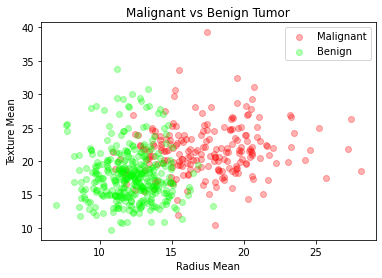

In [ ]:
plt.title("Malignant vs Benign Tumor")
plt.xlabel("Radius Mean")
plt.ylabel("Texture Mean")
plt.scatter(M.radius_mean, M.texture_mean, color = "red", label = "Malignant", alpha = 0.3)
plt.scatter(B.radius_mean, B.texture_mean, color = "lime", label = "Benign", alpha = 0.3)
plt.legend()
plt.show()

Step-5: Preprocessing

Now, malignant tumors will be assigned a value of ‘1’ and benign tumors will be assigned a value of ‘0’.

In [ ]:
print(dataset.diagnosis)
#dataset.diagnosis = [1  if i== "M" else 0 fоr i in dataset.diagnosis]
'''for i in dataset.diagnosis:
  if(i=='M'):
    dataset.diagnosis=1
  else:
    dataset.diagnosis=0'''
#df.loc[df["gender"] == "male", "gender"] = 1
dataset.loc[dataset['diagnosis']=="M", "diagnosis"]=1
dataset.loc[dataset['diagnosis']=="B", "diagnosis"]=0

print(dataset.diagnosis)

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object
0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: object


We now divide our dataframe into x and y components. The x variable includes all independent predictor factors, whereas the y variable provides the diagnostic prediction.

In [ ]:
x = dataset.drop(["diagnosis"], axis = 1)
y = dataset.diagnosis.values



Step-6: Data Normalization

To maximize the model’s efficiency, it’s always a good idea to normalize the data to a common scale.


In [ ]:
# Normalization
#import numpy as np

x = (x - np.min(x)) / (np.max(x) - np.min(x))

/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


Step-7: Test Train Split

After that, we’ll use the train test split module from the sklearn package to divide the dataset into training and testing sections.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( x, y, test_size=0.4, random_state=1)
#print(x_train)
#print(y_train)


Step-8: Sklearn Gaussian Naive Bayes Model

Now we’ll import and instantiate the Gaussian Naive Bayes module from SKlearn GaussianNB. To fit the model, we may pass x_train and y_train.

In [ ]:
from sklearn.naive_bayes import GaussianNB 
nb = GaussianNB()
nb.fit(X_train,y_train)

ValueError: ignored

Step-9: Accuracy

The following accuracy score reflects how successfully our Sklearn Gaussian Naive Bayes model predicted cancer using the test data.

In [ ]:
print("Naive Bayes score: ",nb.score(X_test, y_test))